In [14]:
print("===== LAB 3 SUMMARY =====")

print("Original Shape:", df.shape)

if "df_clean" in globals():
    print("Clean Shape:", df_clean.shape)
    print("Total Missing After:", df_clean.isna().sum().sum())
else:
    print("Clean Shape: Not created yet")
    print("Total Missing After: Not available")

print("Total Missing Before:", df.isna().sum().sum())

if "target" in globals():
    print("Target Variable:", target)
else:
    print("Target Variable: FinalScore")


===== LAB 3 SUMMARY =====
Original Shape: (12, 6)
Clean Shape: (12, 6)
Total Missing After: 0
Total Missing Before: 0
Target Variable: FinalScore


In [15]:
df.head()


,StudentID,StudyHours,AttendanceRate,SleepHours,AssignmentsCompleted,FinalScore
0,1,2,60,5,4,55
1,2,5,80,7,7,75
2,3,1,50,4,3,45
3,4,6,90,8,8,85
4,5,3,70,6,5,65


In [16]:
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].dtype.kind in "biufc":  # numeric
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    else:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean.isna().sum()


StudentID               0
StudyHours              0
AttendanceRate          0
SleepHours              0
AssignmentsCompleted    0
FinalScore              0
dtype: int64

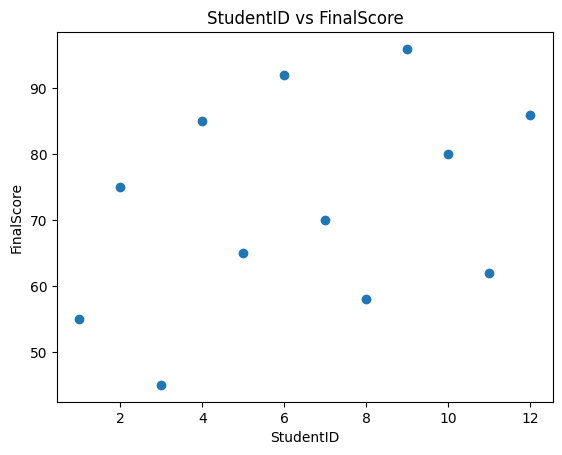

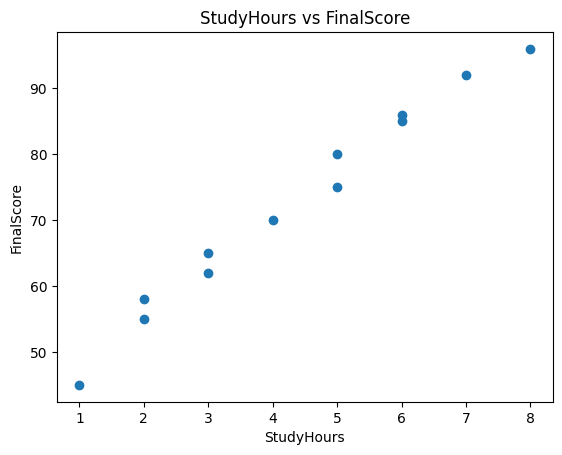

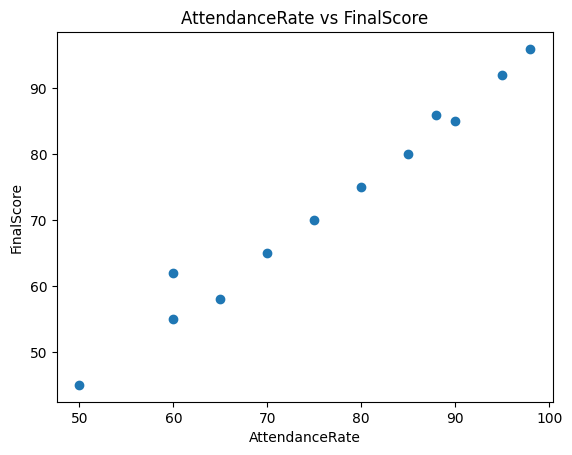

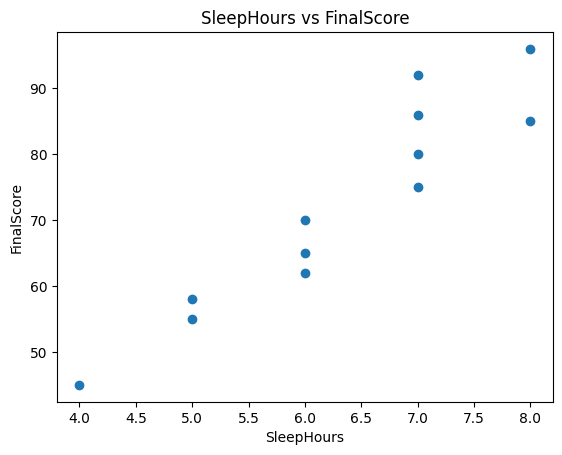

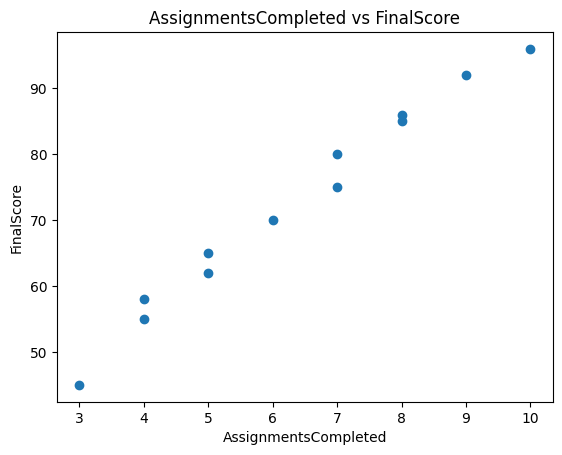

In [17]:
import numpy as np

target = "FinalScore"

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
features = [c for c in num_cols if c != target]

for col in features:
    plt.figure()
    plt.scatter(df[col], df[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()


In [18]:
import numpy as np

target = "FinalScore"

num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

corr_target = corr[target].sort_values(ascending=False)
corr_target


FinalScore              1.000000
StudyHours              0.991552
AssignmentsCompleted    0.991552
AttendanceRate          0.989123
SleepHours              0.940168
StudentID               0.381513
Name: FinalScore, dtype: float64

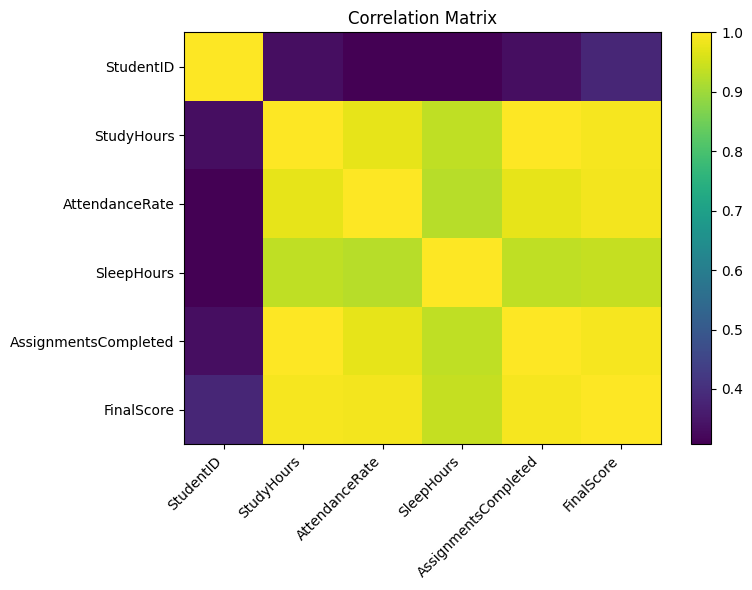

,StudentID,StudyHours,AttendanceRate,SleepHours,AssignmentsCompleted,FinalScore
StudentID,1.000000,0.334166,0.308384,0.307255,0.334166,0.381513
StudyHours,0.334166,1.000000,0.975073,0.933823,1.000000,0.991552
AttendanceRate,0.308384,0.975073,1.000000,0.925610,0.975073,0.989123
SleepHours,0.307255,0.933823,0.925610,1.000000,0.933823,0.940168
AssignmentsCompleted,0.334166,1.000000,0.975073,0.933823,1.000000,0.991552
FinalScore,0.381513,0.991552,0.989123,0.940168,0.991552,1.000000


In [19]:
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Matrix")
plt.colorbar()
plt.tight_layout()
plt.show()

corr


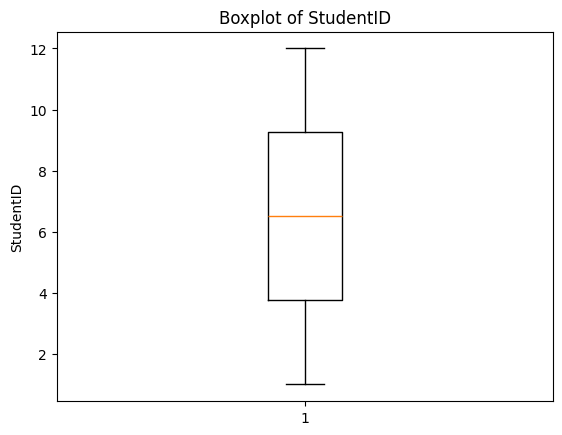

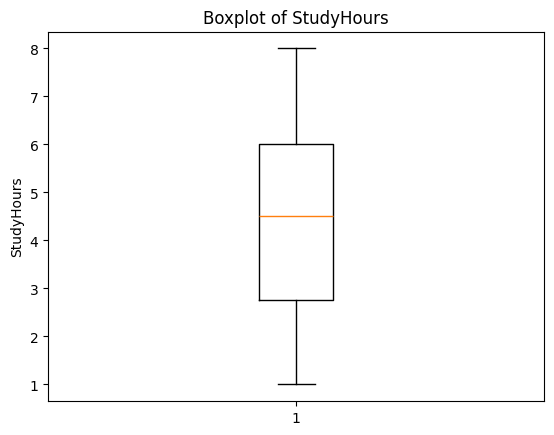

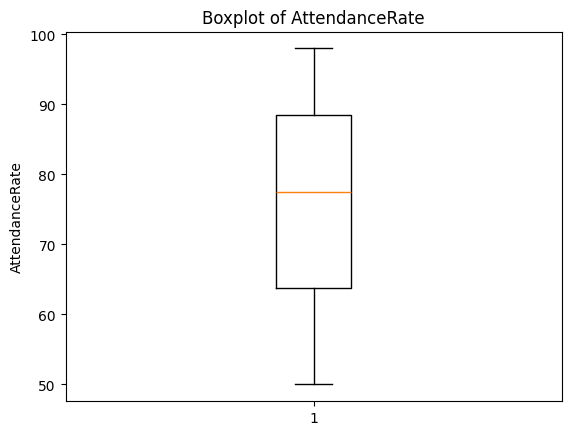

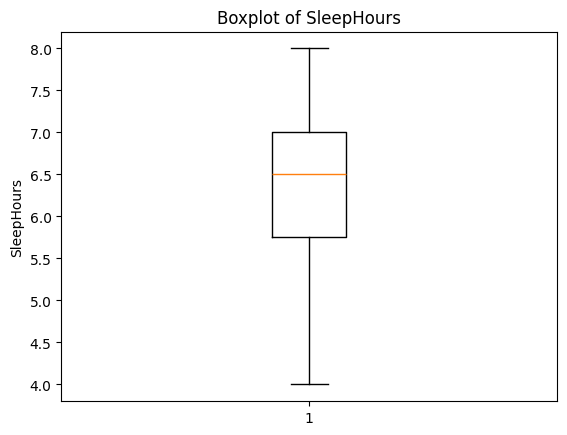

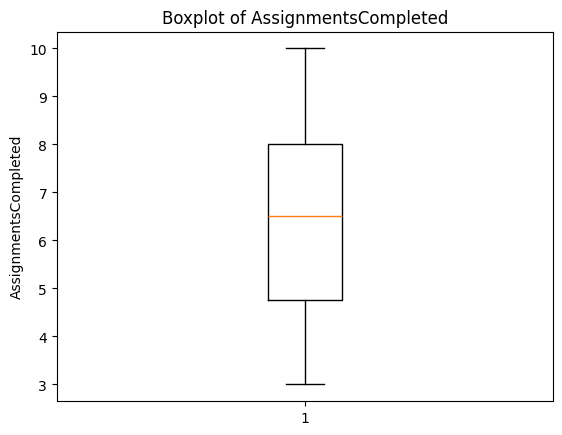

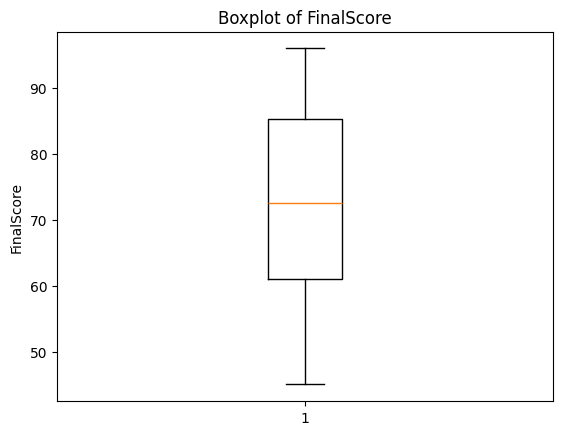

In [20]:
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


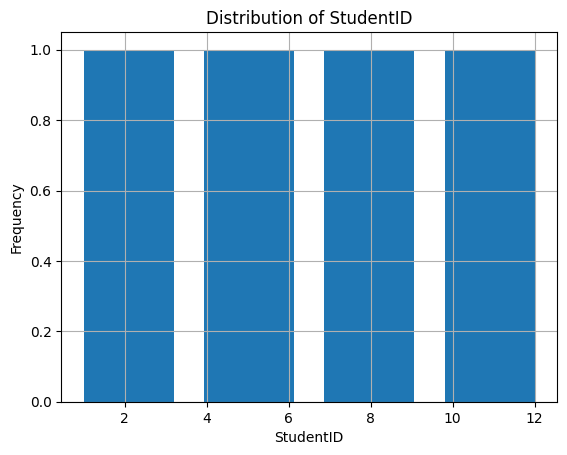

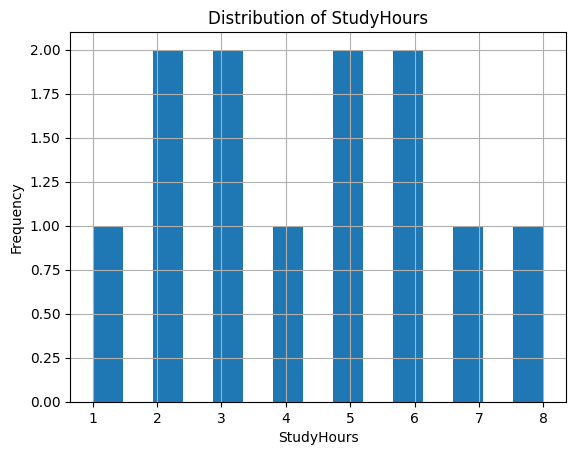

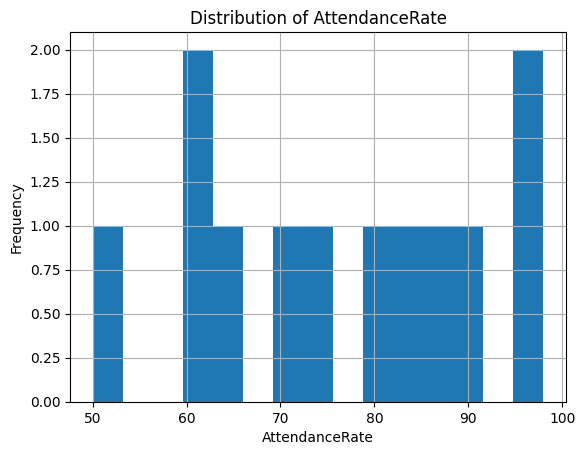

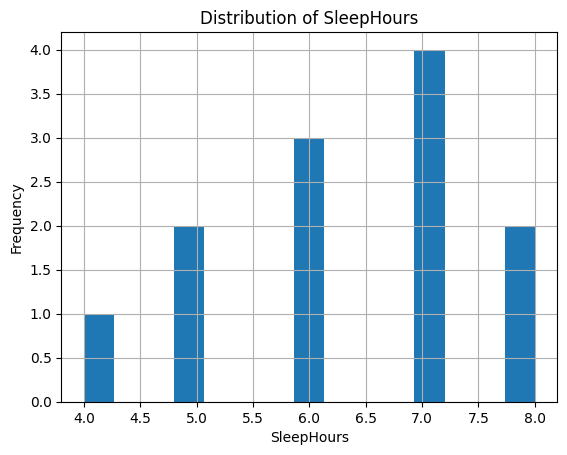

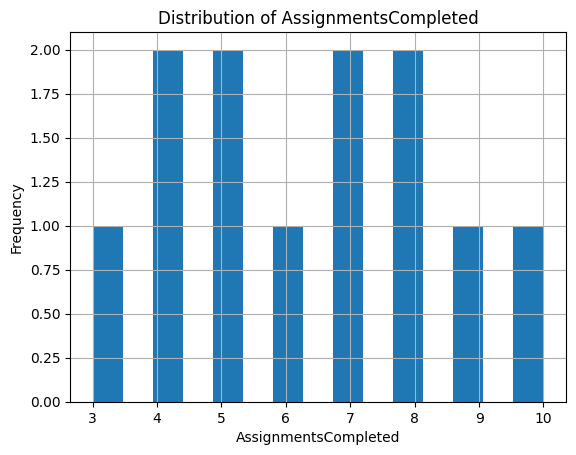

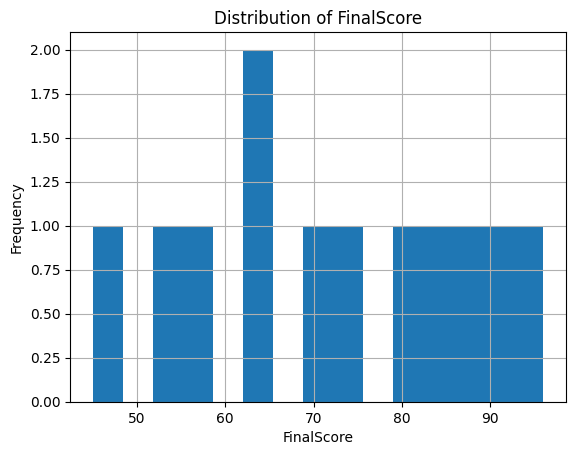

In [21]:
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    plt.figure()
    df[col].hist(bins=15)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [22]:
missing_percent = (df.isna().sum() / len(df)) * 100

missing_table = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Missing %": missing_percent.round(2)
})

missing_table


,Missing Count,Missing %
StudentID,0,0.0
StudyHours,0,0.0
AttendanceRate,0,0.0
SleepHours,0,0.0
AssignmentsCompleted,0,0.0
FinalScore,0,0.0


In [23]:
missing = df.isna().sum()

print("Missing Values per Column:")
print(missing)

print("\nTotal Missing Values:", missing.sum())


Missing Values per Column:
StudentID               0
StudyHours              0
AttendanceRate          0
SleepHours              0
AssignmentsCompleted    0
FinalScore              0
dtype: int64

Total Missing Values: 0


In [24]:
df.describe()

,StudentID,StudyHours,AttendanceRate,SleepHours,AssignmentsCompleted,FinalScore
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,4.333333,76.333333,6.333333,6.333333,72.416667
std,3.605551,2.188122,15.452763,1.230915,2.188122,15.894300
min,1.000000,1.000000,50.000000,4.000000,3.000000,45.000000
25%,3.750000,2.750000,63.750000,5.750000,4.750000,61.000000
50%,6.500000,4.500000,77.500000,6.500000,6.500000,72.500000
75%,9.250000,6.000000,88.500000,7.000000,8.000000,85.250000
max,12.000000,8.000000,98.000000,8.000000,10.000000,96.000000


In [25]:
print("Dataset Shape (rows, columns):", df.shape)

print("\nColumn Names:")
print(list(df.columns))

print("\nData Types:")
print(df.dtypes)

print("\nDataset Info:")
df.info()


Dataset Shape (rows, columns): (12, 6)

Column Names:
['StudentID', 'StudyHours', 'AttendanceRate', 'SleepHours', 'AssignmentsCompleted', 'FinalScore']

Data Types:
StudentID               int64
StudyHours              int64
AttendanceRate          int64
SleepHours              int64
AssignmentsCompleted    int64
FinalScore              int64
dtype: object

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudentID             12 non-null     int64
 1   StudyHours            12 non-null     int64
 2   AttendanceRate        12 non-null     int64
 3   SleepHours            12 non-null     int64
 4   AssignmentsCompleted  12 non-null     int64
 5   FinalScore            12 non-null     int64
dtypes: int64(6)
memory usage: 708.0 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (make sure data.xlsx is in the same folder as this notebook)
df = pd.read_excel("data.xlsx")

df.head()


,StudentID,StudyHours,AttendanceRate,SleepHours,AssignmentsCompleted,FinalScore
0,1,2,60,5,4,55
1,2,5,80,7,7,75
2,3,1,50,4,3,45
3,4,6,90,8,8,85
4,5,3,70,6,5,65
